<a href="https://colab.research.google.com/github/aryamaddel/AutoManim/blob/main/Image_Sampling_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Sampling and Quantization
This notebook demonstrates image sampling (downscaling) and quantization (reducing color levels) using Python.

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

# Resize sampled image to original size for comparison
# Load image from file (download and save as 'tesla.jpg' in same folder)
# Use requests to download the image from the URL
url = "https://cdn.motor1.com/images/mgl/Oo3bgl/s3/tesla-roadster.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")
img = img.resize((256, 256))
img_np = np.array(img)
# Function for sampling
def sample_image(image, factor):
    return image[::factor, ::factor]


resized_sampled_img = Image.fromarray(sampled_img).resize(img.size)
resized_sampled_img_np = np.array(resized_sampled_img)

## Visualize sampling

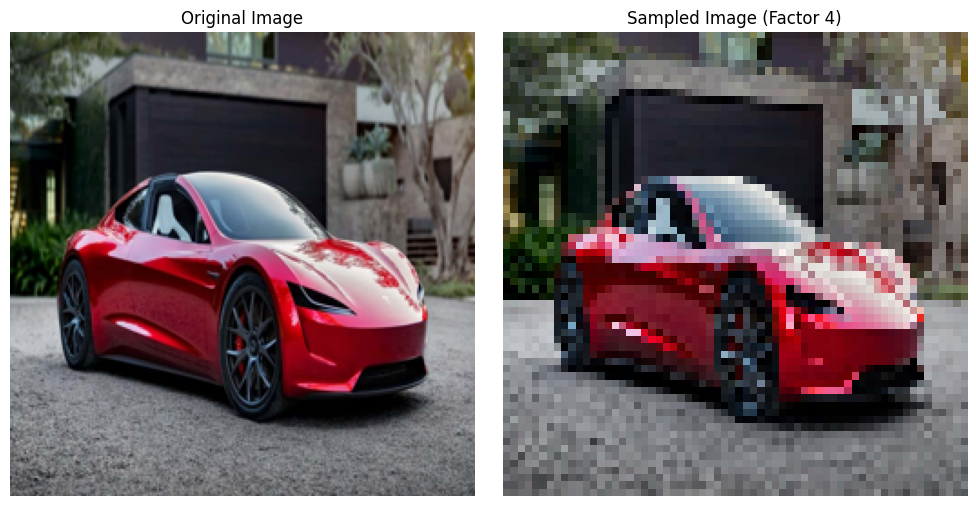

In [20]:
sampling_factor = 4

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_np)
axs[0].set_title('Original Image')
axs[0].axis('off')

sampled_img = sample_image(img_np, sampling_factor)
axs[1].imshow(sampled_img)
axs[1].set_title(f'Sampled Image (Factor {sampling_factor})')
axs[1].axis('off')

plt.tight_layout()
plt.show()

## Visualize sampling changes

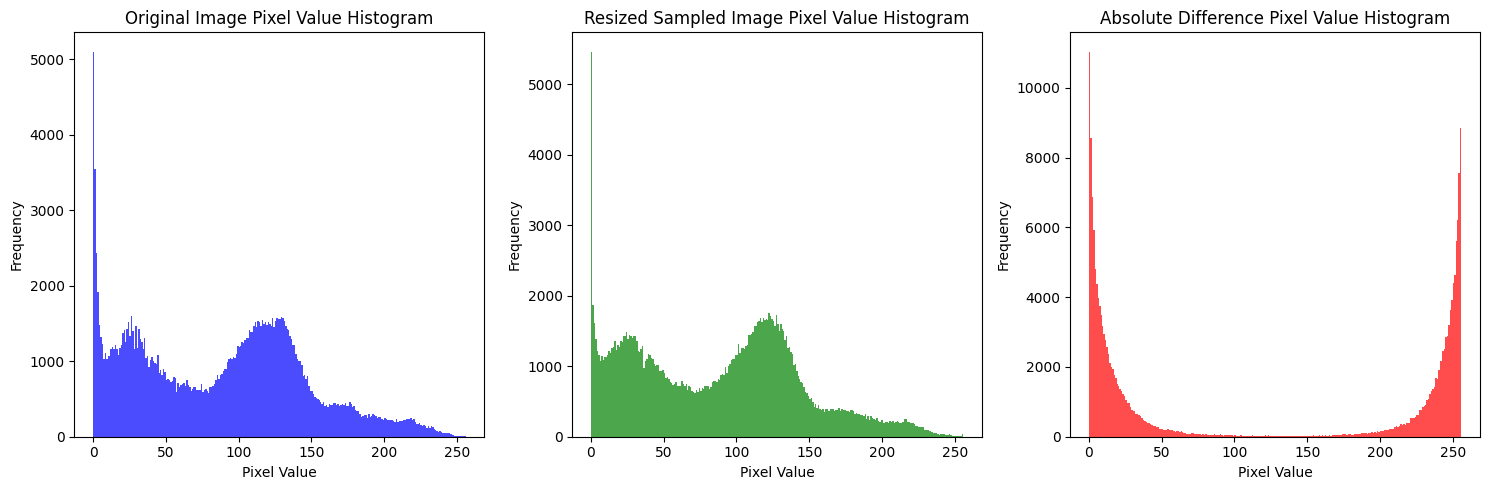

In [21]:
# Calculate the absolute difference
difference_img = np.abs(img_np - resized_sampled_img_np)

# Flatten the images
original_flat = img_np.flatten()
sampled_flat = resized_sampled_img_np.flatten()
difference_flat = difference_img.flatten()

# Create histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(original_flat, bins=256, range=[0, 256], color='blue', alpha=0.7)
axs[0].set_title('Original Image Pixel Value Histogram')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(sampled_flat, bins=256, range=[0, 256], color='green', alpha=0.7)
axs[1].set_title('Resized Sampled Image Pixel Value Histogram')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(difference_flat, bins=256, range=[0, 256], color='red', alpha=0.7)
axs[2].set_title('Absolute Difference Pixel Value Histogram')
axs[2].set_xlabel('Pixel Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize quantization

### Subtask:
Display the original image and a quantized version.


**Reasoning**:
I will define the `quantization_level`, create a figure with two subplots, display the original and quantized images with appropriate titles and axis settings, and finally show the plot, all in a single code block as requested by the instructions.



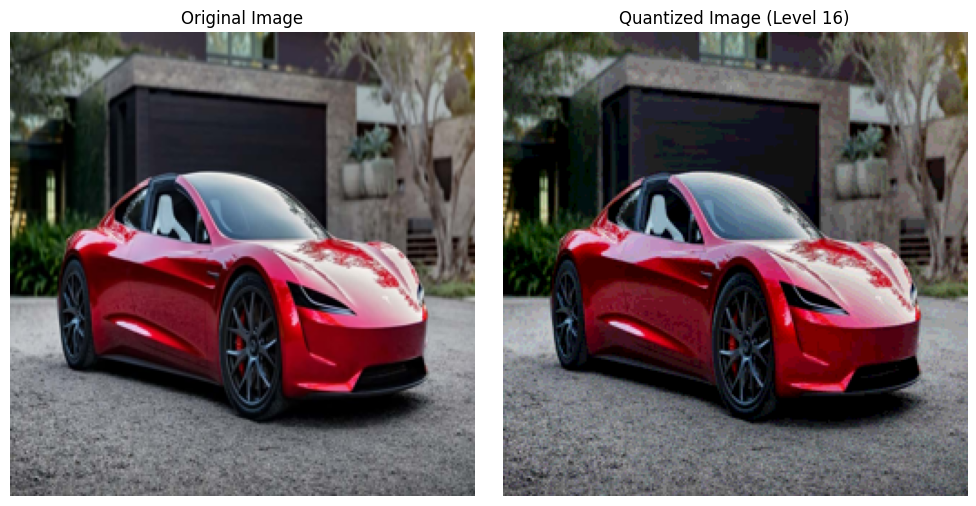

In [22]:
# Function for quantization
def quantize_image(image, levels):
    quantized = np.floor(image / (256 / levels)) * (256 / levels)
    return quantized.astype(np.uint8)

quantization_level = 16

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_np)
axs[0].set_title('Original Image')
axs[0].axis('off')

quantized_img = quantize_image(img_np, quantization_level)
axs[1].imshow(quantized_img)
axs[1].set_title(f'Quantized Image (Level {quantization_level})')
axs[1].axis('off')

plt.tight_layout()
plt.show()

## Visualize quantization changes

### Subtask:
Create a visualization (e.g., a histogram of pixel values) to show the difference between the original and quantized images.


**Reasoning**:
Calculate the absolute difference between the original and quantized images, flatten the arrays, and create histograms for original, quantized, and difference images.



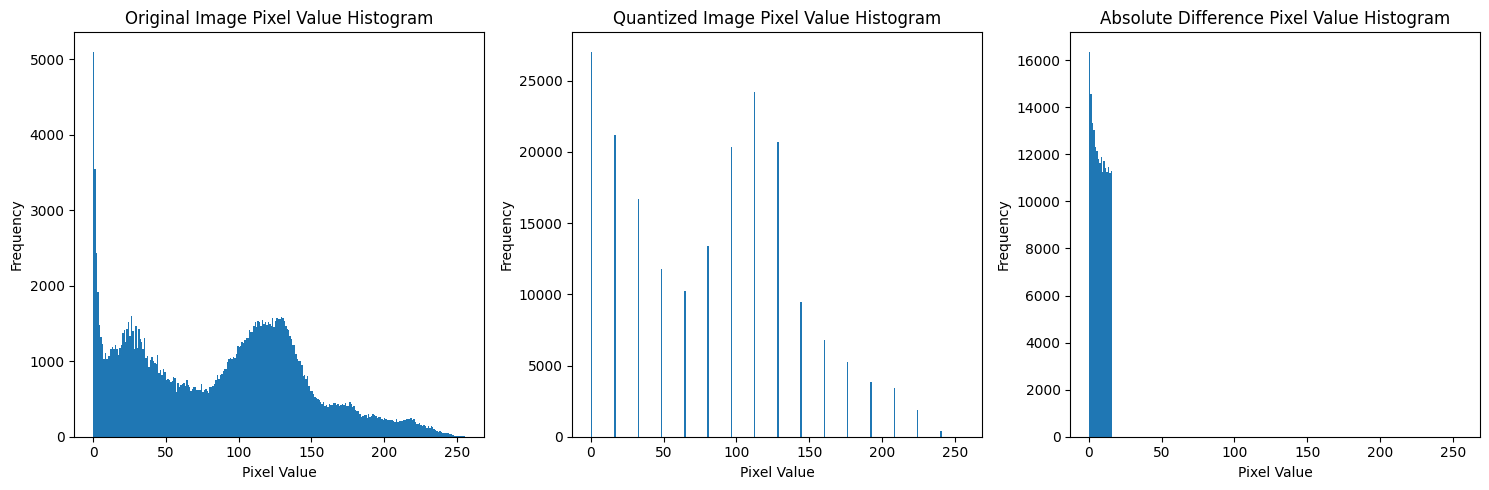

In [23]:
# Calculate the absolute difference
difference_img_quant = np.abs(img_np - quantized_img)

# Flatten the images
original_flat_quant = img_np.flatten()
quantized_flat = quantized_img.flatten()
difference_flat_quant = difference_img_quant.flatten()

# Create histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(original_flat_quant, bins=256, range=[0, 256])
axs[0].set_title('Original Image Pixel Value Histogram')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(quantized_flat, bins=256, range=[0, 256])
axs[1].set_title('Quantized Image Pixel Value Histogram')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(difference_flat_quant, bins=256, range=[0, 256])
axs[2].set_title('Absolute Difference Pixel Value Histogram')
axs[2].set_xlabel('Pixel Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()